## Intro to Pandas

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### Read a File

Read Data from Stanford Open Policing project
https://openpolicing.stanford.edu/data/

In [2]:
df = pd.read_csv('https://stacks.stanford.edu/file/druid:yg821jf8611/yg821jf8611_ca_san_francisco_2020_04_01.csv.zip')

/Users/ndekutoski/anaconda/envs/midsbootcamp/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Inspect the dataset

See the dimensions of the dataset

In [3]:
df.shape # (number_of_rows, number_of_columns)

(905070, 22)

We can look at the first few rows of a DataFrame with `head()`

In [4]:
df.head()

,raw_row_number,date,time,location,lat,lng,district,subject_age,subject_race,subject_sex,...,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_vehicle,search_basis,reason_for_stop,raw_search_vehicle_description,raw_result_of_contact_description
0,869921,2014-08-01,00:01:00,MASONIC AV & FELL ST,37.773004,-122.445873,NaN,NaN,asian/pacific islander,female,...,False,True,warning,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Warning
1,869922,2014-08-01,00:01:00,GEARY&10TH AV,37.780898,-122.468586,NaN,NaN,black,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation
2,869923,2014-08-01,00:15:00,SUTTER N OCTAVIA ST,37.786919,-122.426718,NaN,NaN,hispanic,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation
3,869924,2014-08-01,00:18:00,3RD ST & DAVIDSON,37.746380,-122.392005,NaN,NaN,hispanic,male,...,False,True,warning,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Warning
4,869925,2014-08-01,00:19:00,DIVISADERO ST. & BUSH ST.,37.786348,-122.440003,NaN,NaN,white,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation


We can also pass an integer into `head()` to specify the number of rows we want to see

In [5]:
df.head(2)

,raw_row_number,date,time,location,lat,lng,district,subject_age,subject_race,subject_sex,...,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_vehicle,search_basis,reason_for_stop,raw_search_vehicle_description,raw_result_of_contact_description
0,869921,2014-08-01,00:01:00,MASONIC AV & FELL ST,37.773004,-122.445873,NaN,NaN,asian/pacific islander,female,...,False,True,warning,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Warning
1,869922,2014-08-01,00:01:00,GEARY&10TH AV,37.780898,-122.468586,NaN,NaN,black,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation


In [6]:
df.describe()

,lat,lng,subject_age
count,903373.000000,903373.000000,846182.000000
mean,37.762853,-122.429254,37.818577
std,0.036688,0.042173,13.632684
min,36.038676,-123.767429,10.000000
25%,37.740649,-122.448233,27.000000
50%,37.770038,-122.421294,35.000000
75%,37.782610,-122.408425,47.000000
max,39.929646,-113.268151,100.000000


# Series

We can look at one column of a pandas dataframe - called a Series

In [7]:
df['subject_age']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
905065   NaN
905066   NaN
905067   NaN
905068   NaN
905069   NaN
Name: subject_age, Length: 905070, dtype: float64

We can also call `head()` on a series the same way as a DataFrame

In [8]:
df['subject_age'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: subject_age, dtype: float64

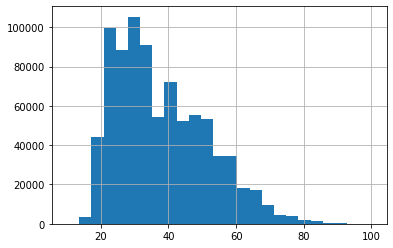

In [9]:
df['subject_age'].hist(bins=25)

In [10]:
# Find Summary Statistics for a Numeric column
df['subject_age'].describe()

count    846182.000000
mean         37.818577
std          13.632684
min          10.000000
25%          27.000000
50%          35.000000
75%          47.000000
max         100.000000
Name: subject_age, dtype: float64

## Summary Statistics on a Series

In [11]:
# Mean of a column
df['subject_age'].mean()

37.81857685462465

In [12]:
# count number of values
df['subject_age'].count()

846182

In [13]:
# Number of unique values in a Series
df['subject_age'].nunique()

91

In [14]:
# Find the unique values of a Series
unique_ages = np.unique(df['subject_age'])
unique_ages

array([10., 11., 12., ..., nan, nan, nan])

In [15]:
# Find the number of null values in a column
df['subject_age'].isna().sum()

58888

Why is the length of the `subject_age` series not equal to the count?

In [16]:
len(df['subject_age']) == df['subject_age'].count()

False

Because of missing / null values!

In [17]:
perc_null = df['subject_age'].count() / df['subject_age'].isna().sum()
print(f"{perc_null.round()}% of dataset is missing")

14.0% of dataset is missing


We'll fill these for now

In [18]:
mean_age = df['subject_age'].mean()
print(f"Mean age: {mean_age}")
df['subject_age'] = df['subject_age'].fillna(df['subject_age'].mean())

Mean age: 37.81857685462465


## Select multiple columns

In [19]:
small_df = df[['time','subject_age', 'citation_issued']]

In [20]:
small_df.head()

,time,subject_age,citation_issued
0,00:01:00,37.818577,False
1,00:01:00,37.818577,True
2,00:15:00,37.818577,True
3,00:18:00,37.818577,False
4,00:19:00,37.818577,True


# Column Operations

### Assign a value to a column

In [21]:
df['NewColumn'] = 'MyValue'

Let's see if our new column is there

In [22]:
df.head(2)

,raw_row_number,date,time,location,lat,lng,district,subject_age,subject_race,subject_sex,...,warning_issued,outcome,contraband_found,search_conducted,search_vehicle,search_basis,reason_for_stop,raw_search_vehicle_description,raw_result_of_contact_description,NewColumn
0,869921,2014-08-01,00:01:00,MASONIC AV & FELL ST,37.773004,-122.445873,NaN,37.818577,asian/pacific islander,female,...,True,warning,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Warning,MyValue
1,869922,2014-08-01,00:01:00,GEARY&10TH AV,37.780898,-122.468586,NaN,37.818577,black,male,...,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation,MyValue


In [23]:
df['NewColumn'].head()

0    MyValue
1    MyValue
2    MyValue
3    MyValue
4    MyValue
Name: NewColumn, dtype: object

### Add a numeric column

In [24]:
df['subject_age'] + 10

0         47.818577
1         47.818577
2         47.818577
3         47.818577
4         47.818577
            ...    
905065    47.818577
905066    47.818577
905067    47.818577
905068    47.818577
905069    47.818577
Name: subject_age, Length: 905070, dtype: float64

## Add String Columns

In [25]:
df['full_timestamp'] = df['date'] + " " + df['time']
df['full_timestamp'].head()

0    2014-08-01 00:01:00
1    2014-08-01 00:01:00
2    2014-08-01 00:15:00
3    2014-08-01 00:18:00
4    2014-08-01 00:19:00
Name: full_timestamp, dtype: object

### Add Numerical Columns

In [26]:
df['subject_age'] + 10

0         47.818577
1         47.818577
2         47.818577
3         47.818577
4         47.818577
            ...    
905065    47.818577
905066    47.818577
905067    47.818577
905068    47.818577
905069    47.818577
Name: subject_age, Length: 905070, dtype: float64

### Slicing String

In [27]:
df['date'].str[:4]

0         2014
1         2014
2         2014
3         2014
4         2014
          ... 
905065    2014
905066    2014
905067    2014
905068    2014
905069    2014
Name: date, Length: 905070, dtype: object

### Sorting

In [28]:
# Sort in ascending order
df.sort_values(by=['subject_age'], ascending=False)

,raw_row_number,date,time,location,lat,lng,district,subject_age,subject_race,subject_sex,...,outcome,contraband_found,search_conducted,search_vehicle,search_basis,reason_for_stop,raw_search_vehicle_description,raw_result_of_contact_description,NewColumn,full_timestamp
206133,173589,2008-08-14,21:53:00,VALLEJO & CARD,37.643488,-122.463757,A,100.0,white,male,...,NaN,True,True,True,other,MPC Violation,"Search without Consent, Positive Result",No Further Action,MyValue,2008-08-14 21:53:00
250250,217719,2009-01-06,18:00:00,400 NORTHPOINT,37.807110,-122.414362,A,100.0,white,male,...,warning,NaN,False,False,NaN,Moving Violation,No Search,Warning,MyValue,2009-01-06 18:00:00
288005,255555,2009-04-30,10:49:00,300 BLK GEARY,37.787376,-122.408247,A,100.0,white,male,...,warning,NaN,False,False,NaN,Moving Violation,No Search,Warning,MyValue,2009-04-30 10:49:00
364042,331729,2010-01-17,18:25:00,SANTA ROSA/CAYUGA,37.727176,-122.436832,H,100.0,white,male,...,warning,True,True,True,other,Moving Violation,"Search without Consent, Positive Result",Warning,MyValue,2010-01-17 18:25:00
861559,744186,2016-03-17,16:27:00,SFO,37.621313,-122.378955,S,99.0,other,male,...,NaN,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,No Further Action,MyValue,2016-03-17 16:27:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610664,578686,2012-07-08,01:50:00,125 BACON ST,37.727386,-122.404041,C,10.0,hispanic,male,...,warning,False,True,True,consent,Mechanical or Non-Moving Violation (V.C.),"Search with Consent, Negative Result",Warning,MyValue,2012-07-08 01:50:00
555822,523842,2011-11-25,10:21:00,MINNESOTA @ 22ND ST,37.757826,-122.390210,C,10.0,black,female,...,citation,NaN,False,False,NaN,Moving Violation,No Search,Citation,MyValue,2011-11-25 10:21:00
788690,797979,2015-04-22,22:30:00,245 BAYSHORE,37.744164,-122.404008,C,10.0,black,female,...,citation,NaN,False,False,NaN,Moving Violation,No Search,Citation,MyValue,2015-04-22 22:30:00
400376,368139,2010-05-22,15:50:00,"O""FARRELL AND LEAVENWORTH",37.785602,-122.414642,J,10.0,white,male,...,citation,NaN,False,False,NaN,Moving Violation,No Search,Citation,MyValue,2010-05-22 15:50:00


In [29]:
# Sort in descending order
df.sort_values(by=['subject_age'], ascending=False)

,raw_row_number,date,time,location,lat,lng,district,subject_age,subject_race,subject_sex,...,outcome,contraband_found,search_conducted,search_vehicle,search_basis,reason_for_stop,raw_search_vehicle_description,raw_result_of_contact_description,NewColumn,full_timestamp
206133,173589,2008-08-14,21:53:00,VALLEJO & CARD,37.643488,-122.463757,A,100.0,white,male,...,NaN,True,True,True,other,MPC Violation,"Search without Consent, Positive Result",No Further Action,MyValue,2008-08-14 21:53:00
250250,217719,2009-01-06,18:00:00,400 NORTHPOINT,37.807110,-122.414362,A,100.0,white,male,...,warning,NaN,False,False,NaN,Moving Violation,No Search,Warning,MyValue,2009-01-06 18:00:00
288005,255555,2009-04-30,10:49:00,300 BLK GEARY,37.787376,-122.408247,A,100.0,white,male,...,warning,NaN,False,False,NaN,Moving Violation,No Search,Warning,MyValue,2009-04-30 10:49:00
364042,331729,2010-01-17,18:25:00,SANTA ROSA/CAYUGA,37.727176,-122.436832,H,100.0,white,male,...,warning,True,True,True,other,Moving Violation,"Search without Consent, Positive Result",Warning,MyValue,2010-01-17 18:25:00
861559,744186,2016-03-17,16:27:00,SFO,37.621313,-122.378955,S,99.0,other,male,...,NaN,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,No Further Action,MyValue,2016-03-17 16:27:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610664,578686,2012-07-08,01:50:00,125 BACON ST,37.727386,-122.404041,C,10.0,hispanic,male,...,warning,False,True,True,consent,Mechanical or Non-Moving Violation (V.C.),"Search with Consent, Negative Result",Warning,MyValue,2012-07-08 01:50:00
555822,523842,2011-11-25,10:21:00,MINNESOTA @ 22ND ST,37.757826,-122.390210,C,10.0,black,female,...,citation,NaN,False,False,NaN,Moving Violation,No Search,Citation,MyValue,2011-11-25 10:21:00
788690,797979,2015-04-22,22:30:00,245 BAYSHORE,37.744164,-122.404008,C,10.0,black,female,...,citation,NaN,False,False,NaN,Moving Violation,No Search,Citation,MyValue,2015-04-22 22:30:00
400376,368139,2010-05-22,15:50:00,"O""FARRELL AND LEAVENWORTH",37.785602,-122.414642,J,10.0,white,male,...,citation,NaN,False,False,NaN,Moving Violation,No Search,Citation,MyValue,2010-05-22 15:50:00


## Pair Programming:

1. What percentage of traffic stops resulted in a citation?

2. Which month had the most traffic stops?
    * hint: can you use the str the `date` column 

3. Which hour of day had the most traffic stops?

4. Can you make a plot from somethin gin the data?
    https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html